# Inleveropgave 1. Bucket Sort

Richard Jansen 1762581

# Bucket sort pseudo code

Een bucket sort begint met een een-dimensionale array van n nummers die gesorteerd worden en een twee-dimensionale array van integers, met rijen genummerd van 0 tot 9 en kolommen geïndexeerd van 0 tot n-1. Elke rij in de twee-dimensionale array heeft een bucket.  Het algoritme werkt dan alsvolgt:

1. Plaats elke waarde van de een-dimensionale array in een rij van de bucket array, gebaseerd op het meest rechtse cijfer in het getal (de "een"-waarde). Bijvoorbeeld, 97 wordt geplaatst in rij 7, 3 wordt geplaatst in rij 3 en 100 wordt geplaatst in rij 0. Deze stap heet de distribution pass.
2. Loop door de bucket array rij voor rij, en kopieer de waardes terug in de originele array. Deze stap heet de gathering pass. De volgorde van de hierboven genoemde getallen is dus nu 100, 3, 97.
3. Herhaal dit proces voor elke volgende digit-positie (dus voor de tientallen, honderdtallen, etc.). Na de laatste gathering pass is de array gesorteerd.
4. Verzin een aanpassing als oplossing voor de negatieve getallen, maar maak ook hierbij gebruik van een distribution en gathering pass


## Opdracht
1. Schrijf een implementatie van het bovenstaande Bucket Sort algoritme voor het sorteren van gehele getallen $ x \in \mathbb{Z} x ∈ Z$  .
2. Benader zo precies mogelijk de de tijds- en ruimtecomplexiteit van je algoritme. (Dus niet m.b.v. asymptotische notatie)
3. Bepaal, net als eerder, op basis van een test en door analyse, de Big O waarde van Bucket Sort.
4. Extra: Maak je BucketSort implementatie ook geschikt voor het sorteren van getallen met cijfers achter de komma $ x \in\mathbb{R}x ∈ R $
5. Extra: Laat bij je analyse zien dat je onderzoek hebt gedaan over wat wel en niet mee te nemen in je analyse (is een variable assignment een stap? hoeveel ruimte kost je datastructuur?)
6. Extra: Overleg met je docent als je andere ideeën hebt of deze kunnen gelden als extra voor een hoger cijfer

#### Aanvulling van de docent

![](https://cdn.discordapp.com/attachments/663809977508429834/806859221298839622/unknown.png)

# Setup and imports

In [1]:
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
randomlist1k  = list(np.random.randint(low=0, high=1000, size=1000))
randomlist10k = list(np.random.randint(low=0, high=1000, size=10000))
randomlist30k = list(np.random.randint(low=0, high=1000, size=30000))

In [3]:
def createRandomList(low, high, size):
    return list(np.random.randint(low=low, high=high, size=size))

In [4]:
def split_list(input_list:[int]) -> [[int]]:
    neg_values_abs = [abs(ele) for ele in input_list if ele < 0] 
    pos_values = [ele for ele in input_list if ele > 0]
    return [neg_values_abs,pos_values]
    

def bucket_sort(input_list: [int]) -> [int]:
        
    return_list = []
    list_values = split_list(input_list)
    
    for value in list_values:
        if value == []:
            return_list.append([])
            continue
        input_list = value    
        longest_digit = len(str(max(input_list)))

        # The number system can be changed to other systems like binairy, decimal, hexidecimal, etc
        number_system = 10
        digit_index = 10  

        #The legth of the digits
        for i in range(longest_digit):

            # Create new buckets each time
            buckets_list = [[] for _ in range(10)]

            for number in input_list:
                #First attempt code, Don't del plz :c
    #             buckets_list[int(str(number).zfill(longest_digit)[-i+1:-i+1+1])].append(number)
    #             buckets_list[int(str(number).zfill(longest_digit)[i-1])].append(number)

                # Check the digit index position by checking the left over digits (modulo) from 1 index to the left
                # Check how many times the most left number from the left over fits in the numsystem index
                buckets_list[(number % digit_index) // (digit_index // number_system)].append(number)
            digit_index = digit_index * number_system 

            # Clear input list and add bucket values to it
            input_list = []
            for bucket in buckets_list:
                input_list += [i for i in bucket]
        return_list.append(input_list)

    return_list[0] = [ -x for x in return_list[0]][::-1]

    return return_list[0]+return_list[1]
    

# Example

We hebben 3165 als getal en willen de 3e index vanaf rechts hebben.

Dat is dus 1

De code hier onder laat zien hoe dat werkt

In [5]:
print(3165 % 1000)
print(1000 // 10)
print((3165 % 1000) // (1000 // 10))

165
100
1


# Algoritme testen

###### Setup random lists

In [6]:
randomlist1dec = createRandomList(0, 10, 15)
randomlist2dec = createRandomList(0, 100, 15)
randomlist3dec = createRandomList(0, 1000, 15)

randomlist2dec_neg = createRandomList(-100, 100, 15)
print(f"randomlist1dec {randomlist1dec}")
print(f"randomlist2dec {randomlist2dec}")
print(f"randomlist3dec {randomlist3dec}")

print(f"randomlist2dec_neg {randomlist2dec_neg}")

randomlist1dec [6, 8, 2, 9, 7, 2, 6, 1, 0, 6, 9, 4, 7, 0, 3]
randomlist2dec [94, 28, 61, 36, 61, 15, 53, 83, 71, 10, 34, 3, 12, 35, 3]
randomlist3dec [654, 515, 797, 762, 0, 480, 163, 816, 450, 880, 801, 623, 444, 461, 968]
randomlist2dec_neg [23, 89, 58, 99, -33, 2, 11, -100, 47, 23, -34, 48, -51, 43, -79]


In [7]:
print(f"randomlist1dec = {randomlist1dec} \nafter sort       {bucket_sort(randomlist1dec)}")
print()
print(f"randomlist2dec = {randomlist2dec} \nafter sort       {bucket_sort(randomlist2dec)}")
print()
print(f"randomlist3dec = {randomlist3dec} \nafter sort       {bucket_sort(randomlist3dec)}")
print()
print(f"randomlist2dec_neg = {randomlist2dec_neg} \nafter sort           {bucket_sort(randomlist2dec_neg)}")

randomlist1dec = [6, 8, 2, 9, 7, 2, 6, 1, 0, 6, 9, 4, 7, 0, 3] 
after sort       [1, 2, 2, 3, 4, 6, 6, 6, 7, 7, 8, 9, 9]

randomlist2dec = [94, 28, 61, 36, 61, 15, 53, 83, 71, 10, 34, 3, 12, 35, 3] 
after sort       [3, 3, 10, 12, 15, 28, 34, 35, 36, 53, 61, 61, 71, 83, 94]

randomlist3dec = [654, 515, 797, 762, 0, 480, 163, 816, 450, 880, 801, 623, 444, 461, 968] 
after sort       [163, 444, 450, 461, 480, 515, 623, 654, 762, 797, 801, 816, 880, 968]

randomlist2dec_neg = [23, 89, 58, 99, -33, 2, 11, -100, 47, 23, -34, 48, -51, 43, -79] 
after sort           [-100, -79, -51, -34, -33, 2, 11, 23, 23, 43, 47, 48, 58, 89, 99]


# Conclusie

Het algortime werkt met elke grote van lijsten en ook negatieve getalen ge mixed

# tijds- en ruimtecomplexiteit van het algoritme

### Time tracker

In [8]:
def get_time_complex(list_of_sorting_lists: [[int]]) -> {int : float}:
    
    return_times_dict = {}
    for unsorted_list in list_of_sorting_lists:
        start = timer()
        bucket_sort(unsorted_list)
        elapsed_time = timer() - start
        
        return_times_dict[len(unsorted_list)] =  elapsed_time
    return return_times_dict

### Random unsorted list test

In [9]:
low = 0
high = 100

randomlist1k = createRandomList(low, high, 1000)
randomlist5k = createRandomList(low, high, 5000)
randomlist10k = createRandomList(low, high, 10000)
randomlist15k = createRandomList(low, high, 15000)
randomlist20k = createRandomList(low, high, 20000)
randomlist25k = createRandomList(low, high, 25000)
randomlist30k = createRandomList(low, high, 30000)

unsortedlists = [randomlist1k,randomlist5k,randomlist10k,randomlist15k,randomlist20k,randomlist25k,randomlist30k]


In [10]:
time_complex_data = get_time_complex(unsortedlists)

In [11]:
time_complex_data

{1000: 0.0013138000000001426,
 5000: 0.006218000000000057,
 10000: 0.012994100000000008,
 15000: 0.018981600000000043,
 20000: 0.025104900000000097,
 25000: 0.03235889999999997,
 30000: 0.03882849999999993}

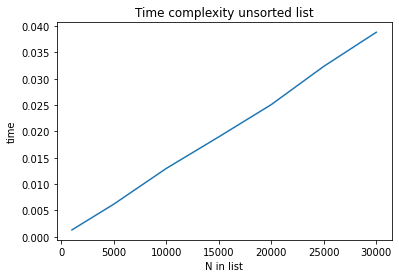

In [12]:
ax1 = sns.lineplot(data = time_complex_data, legend ="auto",markers=True, dashes=False)
ax1.set(xlabel='N in list', ylabel='time', title ='Time complexity unsorted list')
plt.show()

## Conclusie unsorted list

De tijd die mijn algoritme er overdoet is linear

Dit zegt niks over de werkelijke complexiteit omdat het computer afhankelijk is

### Sorted List Test

In [13]:
list1k =  [i for i in range(1000)]
list5k =  [i for i in range(5000)]
list10k = [i for i in range(10000)]
list15k = [i for i in range(15000)]
list20k = [i for i in range(20000)]
list25k = [i for i in range(25000)]
list30k = [i for i in range(30000)]

sortedlists = [list1k,list5k,list10k,list15k,list20k,list25k,list30k]

In [14]:
time_complex_data_sorted = get_time_complex(sortedlists)

In [15]:
time_complex_data_sorted

{1000: 0.000375200000000131,
 5000: 0.002210200000000162,
 10000: 0.00418419999999986,
 15000: 0.007930900000000074,
 20000: 0.010286900000000099,
 25000: 0.012916900000000009,
 30000: 0.015070699999999881}

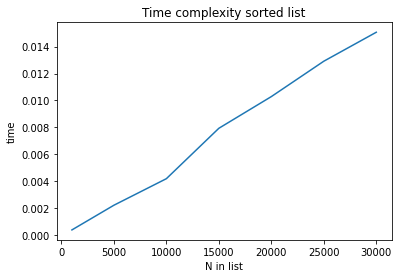

In [16]:
ax2 = sns.lineplot(data = time_complex_data_sorted, legend ="auto",markers=True, dashes=False)
ax2.set(xlabel='N in list', ylabel='time', title ='Time complexity sorted list')
plt.show()

## Conclusie sorted list

De tijd die mijn algoritme er overdoet is linear, ook al zit er een random kronkeltje in

Dit zegt niks over de werkelijke complexiteit omdat het computer afhankelijk is

### Inverted Sorted List

In [17]:
list1kin =  [i for i in range(1000)][::-1]
list5kin =  [i for i in range(5000)][::-1]
list10kin = [i for i in range(10000)][::-1]
list15kin = [i for i in range(15000)][::-1]
list20kin = [i for i in range(20000)][::-1]
list25kin = [i for i in range(25000)][::-1]
list30kin = [i for i in range(30000)][::-1]

sortedlistsin = [list1kin,list5kin,list10kin,list15kin,list20kin,list25kin,list30kin]

In [18]:
time_complex_data_sortedin = get_time_complex(sortedlistsin)

In [19]:
time_complex_data_sortedin

{1000: 0.0004763000000000961,
 5000: 0.002340100000000067,
 10000: 0.00419959999999997,
 15000: 0.008166899999999977,
 20000: 0.010153500000000149,
 25000: 0.012621100000000052,
 30000: 0.015477699999999928}

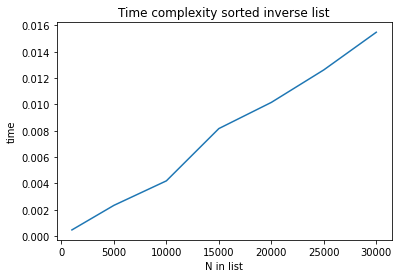

In [20]:
ax3 = sns.lineplot(data = time_complex_data_sortedin, legend ="auto",markers=True, dashes=False)
ax3.set(xlabel='N in list', ylabel='time', title ='Time complexity sorted inverse list')
plt.show()

## Conclusie inverted sorted list

De tijd die mijn algoritme er overdoet is linear, maar nu zitten er wel meer cronkels in de lijn

Dit zegt niks over de werkelijke complexiteit omdat het computer afhankelijk is

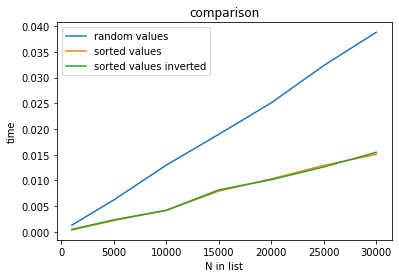

In [21]:
plt.plot(time_complex_data.keys() , time_complex_data.values())
plt.plot(time_complex_data_sorted.keys() , time_complex_data_sorted.values())
plt.plot(time_complex_data_sortedin.keys() , time_complex_data_sortedin.values())

plt.legend(["random values", "sorted values", "sorted values inverted"])
plt.xlabel('N in list')
plt.ylabel('time')
plt.title("comparison")

plt.show()

# Conclusie big O bucket sort

Ik been door mijn code heen gegaan en als eerst de complexiteit bepaald voor de worst case. Hier onder staan de stappen en het uitgewerkte plaatje

Itereer over de hele lijst 2 x dus 2n

Itereer over de hele lijst 2 x dus 2n

Herhaal het proces i aantal x (langste digit)

Itereer over de hele lijst heen en plaats het element op de juiste plek n

Itereer over de bucket list k

Itereer over alle items n

Itereer over de negatieve lijst en reverse het 2 * n 


![](https://cdn.discordapp.com/attachments/701351521433944066/807192961741094922/complexiteit_uitleg.png)

[link naar orginal for better quality](https://cdn.discordapp.com/attachments/701351521433944066/807192961741094922/complexiteit_uitleg.png)



#### Best case
In de best case zijn de getallen die er in gaan allemaal positief of allemaal negatief. Het effect hiervan is dat de me algoritme maar 1x wordt uitgevoerd ipv 2x 

$\mathcal{O}(5n (I  n + k  n)$

#### Worst case


$\mathcal{O}(6n (I  n + k  n)$

 ### de benadering van big O
 
 Voor bijde gevallen kan je de constanten weg laten en kom je uit op
 
 $\mathcal{O}( n (I n + k  n)$
 
Dit verklaart de Lineaire complexiteit van het algoritme

# Space complexiteit

Het programma begint met de input | N

Daarna wordt het N opgesplits in 2 extra instaties (positief en negatieve getallen) | 2N

Het programma maakt een bucket list aan met de lengte | K

Het programma shuffelt de getallen van input naar bucket naar input en aan het einde combineert het alles | Geen verandern

Space complexiteit = $\mathcal{O} (3N + K)$
